In [68]:
import geopandas as gpd
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
lead = pd.read_csv('raw/env-agents/data-zdvVk.csv')
lead.head()

,State,County,Population,Number of children tested,Percentage of children with levels higher than 5 ug/dl,Percentage of children with levels higher than 10 ug/dl,Percentage of population under the poverty line
0,AL,Autauga County,55136,29,Unknown,0,12.8
1,AL,Baldwin County,191205,357,1.7%,0.6,13.8
2,AL,Barbour County,27119,23,Unknown,4.3,24.1
3,AL,Bibb County,22653,41,Unknown,0,17.0
4,AL,Blount County,57645,250,1.2%,0,17.3


In [3]:
counties = gpd.read_file('raw/spatial/us-counties/cb_2018_us_county_500k/cb_2018_us_county_500k.shp')

In [4]:
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."


In [5]:
states = gpd.read_file('raw/spatial/us-states/cb_2018_us_state_500k.shp')

In [6]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [7]:
states = states[['STATEFP', 'STUSPS']]

In [8]:
states.head()

,STATEFP,STUSPS
0,28,MS
1,37,NC
2,40,OK
3,51,VA
4,54,WV


In [13]:
def get_stusps(x):
    stusps = states[states['STATEFP'] == x].STUSPS.values[0]
    return stusps


counties['STUSPS'] = counties.STATEFP.apply(get_stusps)

In [15]:
counties.to_file('processed-spatial/counties_and_states.json', driver='GeoJSON')

/Users/szymonos/.conda/envs/spatial/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [16]:
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,STUSPS
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",KY
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",KY
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074...",KY
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646...",KY
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450...",KY


In [17]:
# Merge with lead

In [58]:
def remove_county(x):
    x = x.replace('County', '')
    x = ''.join(x.rstrip())
    return x


lead['NAME'] = lead['County'].apply(remove_county)

In [59]:
lead.rename(columns={'State': 'STUSPS'}, inplace=True)

In [60]:
lead.head()

,STUSPS,County,Population,Number of children tested,Percentage of children with levels higher than 5 ug/dl,Percentage of children with levels higher than 10 ug/dl,Percentage of population under the poverty line,NAME
0,AL,Autauga County,55136,29,Unknown,0,12.8,Autauga
1,AL,Baldwin County,191205,357,1.7%,0.6,13.8,Baldwin
2,AL,Barbour County,27119,23,Unknown,4.3,24.1,Barbour
3,AL,Bibb County,22653,41,Unknown,0,17.0,Bibb
4,AL,Blount County,57645,250,1.2%,0,17.3,Blount


In [61]:
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,STUSPS
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",KY
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",KY
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074...",KY
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646...",KY
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450...",KY


In [62]:
mrgd = pd.merge(counties, lead, how='inner', on=['STUSPS', 'NAME'])

In [63]:
mrgd.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,STUSPS,County,Population,Number of children tested,Percentage of children with levels higher than 5 ug/dl,Percentage of children with levels higher than 10 ug/dl,Percentage of population under the poverty line
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",KY,Ballard County,8274,77,1.3%,0,16.7
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",KY,Bourbon County,19972,273,3.3%,0,17.7
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074...",KY,Butler County,12797,42,Unknown,0,27.3
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646...",KY,Estill County,14547,105,2.9%,1,29.2
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450...",KY,Fleming County,14505,235,5.5%,0,19.6


In [65]:
mrgd.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [79]:
def get_percent(x):
    if x[0].isdigit():
        x = x.replace('%', '')
        try:
            x = float(x)
        except ValueError:
            print(x[0], 'ERROR', print(x[0].isdigit()))
            raise ValueError
        return x
    else:
        return np.nan

In [80]:
mrgd['%>5ug/dl'] = mrgd['Percentage of children with levels higher than 5 ug/dl'].apply(get_percent)

<AxesSubplot:>

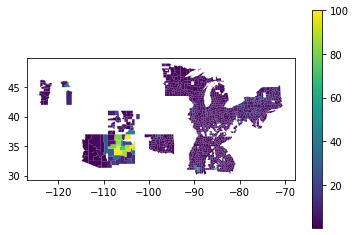

In [83]:
mrgd.plot(column='%>5ug/dl', legend=True)

In [84]:
mrgd.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry', 'STUSPS', 'County', 'Population',
       'Number of children tested',
       'Percentage of children with levels higher than 5 ug/dl',
       'Percentage of children with levels higher than 10 ug/dl',
       'Percentage of population under the poverty line', '%>5ug/dl'],
      dtype='object')

In [85]:
final = mrgd[['STATEFP', 'COUNTYFP', 'NAME', 'geometry', 'STUSPS', 'Population',
       'Number of children tested',
       'Percentage of children with levels higher than 5 ug/dl',
       'Percentage of children with levels higher than 10 ug/dl',
       'Percentage of population under the poverty line', '%>5ug/dl']].copy()

In [86]:
final.to_file('processed-spatial/lead_by_county.json', driver='GeoJSON')

/Users/szymonos/.conda/envs/spatial/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [87]:
# Group by states

In [88]:
grouped = final.drop('geometry', axis=1)

In [99]:
grouped.head()

,STATEFP,COUNTYFP,NAME,STUSPS,Population,Number of children tested,Percentage of children with levels higher than 5 ug/dl,Percentage of children with levels higher than 10 ug/dl,Percentage of population under the poverty line,%>5ug/dl
0,21,007,Ballard,KY,8274,77,1.3%,0,16.7,1.3
1,21,017,Bourbon,KY,19972,273,3.3%,0,17.7,3.3
2,21,031,Butler,KY,12797,42,Unknown,0,27.3,NaN
3,21,065,Estill,KY,14547,105,2.9%,1,29.2,2.9
4,21,069,Fleming,KY,14505,235,5.5%,0,19.6,5.5


In [97]:
grouped_population_sum = grouped[['STUSPS', 'Population', 'Number of children tested']].groupby(by='STUSPS').sum()

In [98]:
grouped_population_sum

,Population
STUSPS,
AL,4800408
AZ,6561516
CO,5177588
CT,3592053
GA,9907756
IL,12801634
IN,6542411
KY,4267639
MA,6657291


In [105]:
grouped['Number of children tested'].replace('Less than 5', 1, inplace=True)

In [106]:
grouped['Number of children tested'] = grouped['Number of children tested'].astype(int)

In [107]:
grouped.head()

,STATEFP,COUNTYFP,NAME,STUSPS,Population,Number of children tested,Percentage of children with levels higher than 5 ug/dl,Percentage of children with levels higher than 10 ug/dl,Percentage of population under the poverty line,%>5ug/dl
0,21,007,Ballard,KY,8274,77,1.3%,0,16.7,1.3
1,21,017,Bourbon,KY,19972,273,3.3%,0,17.7,3.3
2,21,031,Butler,KY,12797,42,Unknown,0,27.3,NaN
3,21,065,Estill,KY,14547,105,2.9%,1,29.2,2.9
4,21,069,Fleming,KY,14505,235,5.5%,0,19.6,5.5


In [108]:
grouped_population_sum = grouped[['STUSPS', 'Population', 'Number of children tested']].groupby(by='STUSPS').sum()

In [115]:
grouped['Number of children with positive results higher than 5 ug/dl'] = (grouped['%>5ug/dl'] * 0.01 * grouped['Number of children tested']).round(0)

In [131]:
grouped_population_sum = grouped[['STUSPS',
                                  'Population',
                                  'Number of children tested',
                                  'Number of children with positive results higher than 5 ug/dl']].groupby(
    by='STUSPS').sum()

In [132]:
grouped_population_sum.head()

,Population,Number of children tested,Number of children with positive results higher than 5 ug/dl
STUSPS,,,
AL,4800408,16847,507.0
AZ,6561516,42756,519.0
CO,5177588,14550,338.0
CT,3592053,66433,3459.0
GA,9907756,92240,2204.0


In [133]:
grouped_population_sum['%>5ug/dl'] = 100 * grouped_population_sum['Number of children with positive results higher than 5 ug/dl'] / grouped_population_sum['Number of children tested']

In [134]:
grouped_population_sum.head()

,Population,Number of children tested,Number of children with positive results higher than 5 ug/dl,%>5ug/dl
STUSPS,,,,
AL,4800408,16847,507.0,3.009438
AZ,6561516,42756,519.0,1.213865
CO,5177588,14550,338.0,2.323024
CT,3592053,66433,3459.0,5.206750
GA,9907756,92240,2204.0,2.389419


In [135]:
# Create geodataframe

In [136]:
grouped_population_sum.reset_index(inplace=True)

In [137]:
states = gpd.read_file('raw/spatial/us-states/cb_2018_us_state_500k.shp')

In [138]:
lead_states = states.merge(grouped_population_sum, on='STUSPS')

<AxesSubplot:>

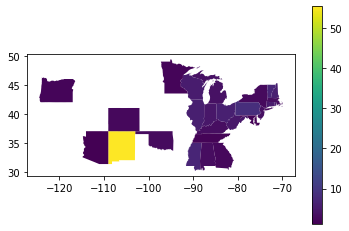

In [139]:
lead_states.plot(column='%>5ug/dl', legend=True)

In [140]:
lead_states.to_file('processed-spatial/lead_by_state.json', driver='GeoJSON')

/Users/szymonos/.conda/envs/spatial/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
